In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import re

In [2]:
def HLA_cd8_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace(",", "").replace("'","").split(" ")

def cdr3_lst_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def epitope_converter(x):
    #define format of datetime
    return [y for y in x.replace("[","").replace("]","").replace("\n","").split("'") if (y != '') & (y != ' ')]

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("\n","").replace("'",""))

def literal_converter(val):
    # replace NaN with '' and perform literal eval on the rest
    return [] if val == '' else literal_eval(val)

converters = {'peptide_HLA_lst': peptide_hla_converter,
              'umi_count_lst_mhc': literal_converter, #literal_eval,
              'umi_count_lst_TRA': literal_converter,'umi_count_lst_TRB': literal_converter,
              'cdr3_lst_TRA': cdr3_lst_converter,
              'cdr3_lst_TRB': cdr3_lst_converter,
              'HLA_lst_mhc': cdr3_lst_converter,'HLA_cd8': HLA_cd8_converter} #

# Input

In [3]:
CAT_DIR = '../experiments/exp13/run2/cat/'

In [4]:
INPUT = CAT_DIR + 'tables/tcr_barcode.cleaned.csv'

In [5]:
VALID = CAT_DIR + "eval_clonotypes/valid_ct.csv"

# Load

In [23]:
df = pd.read_csv(INPUT, converters=converters)

In [24]:
df.head()

,gem,clonotype,num_clonotype,ct,genes_TRA,genes_TRB,genes_lst_TRA,genes_lst_TRB,length_TRA,cdr1_TRA,...,VDJdb_check,seurat,umi_count_hto,feature_hto,hto_max_id,hto_sec_id,hto_margin,hto_classification,hto_global_class,hash_id
0,AAACCTGAGGTAGCTG-1,clonotype2510,2510.0,2510.0,TRAV38-1;TRAJ26;TRAC,TRBV9;;TRBJ1-2;TRBC1,['TRAV38-1;TRAJ26;TRAC'],['TRBV9;;TRBJ1-2;TRBC1'],477.0,TSENNYY,...,NaN,SeuratProject,1723.0,8.0,6.0,5.0,4.075762,6,Singlet,6
1,AAACCTGAGTTATCGC-1,clonotype1460,1460.0,1460.0,TRAV8-1;TRAJ11;TRAC,TRBV3-1;;TRBJ2-5;TRBC2,['TRAV8-1;TRAJ11;TRAC'],['TRBV3-1;;TRBJ2-5;TRBC2'],568.0,YGGTVN,...,NaN,SeuratProject,916.0,9.0,10.0,1.0,2.122286,10,Singlet,10
2,AAACGGGCATAGAAAC-1,clonotype309,309.0,309.0,TRAV1-2;TRAJ33;TRAC,TRBV6-1;;TRBJ1-2;TRBC1,['TRAV1-2;TRAJ33;TRAC'],['TRBV6-1;;TRBJ1-2;TRBC1'],505.0,TSGFNG,...,NaN,SeuratProject,1383.0,8.0,9.0,8.0,4.545152,8_9,Doublet,Doublet
3,AAACGGGGTAAGCACG-1,clonotype1,1.0,1.0,TRAV30;TRAJ38;TRAC,TRBV3-1;;TRBJ1-5;TRBC1,['TRAV30;TRAJ38;TRAC'],['TRBV3-1;;TRBJ1-5;TRBC1'],517.0,KALYS,...,NaN,SeuratProject,752.0,10.0,10.0,9.0,1.766928,10,Singlet,10
4,AAACGGGGTTACGACT-1,clonotype2817,2817.0,2817.0,TRAV19;TRAJ34;TRAC,TRBV14;;TRBJ2-3;TRBC2,['TRAV19;TRAJ34;TRAC'],['TRBV14;;TRBJ2-3;TRBC2'],562.0,TRDTTYY,...,NaN,SeuratProject,663.0,9.0,10.0,6.0,1.875212,10,Singlet,10


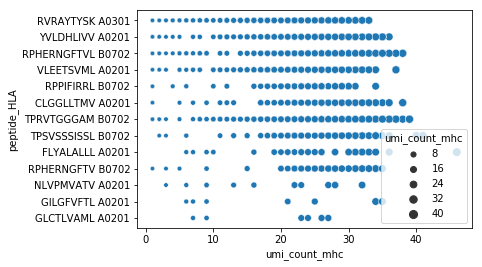

In [28]:
sns.scatterplot(data=df, x='umi_count_mhc',y='peptide_HLA', size='umi_count_mhc', size_order=[1,10,20,30,40])
plt.show()

In [15]:
df.loc[[0,1,0],['gem','clonotype','gem']]

,gem,clonotype,gem
0,AAACCTGAGGTAGCTG-1,clonotype2510,AAACCTGAGGTAGCTG-1
1,AAACCTGAGTTATCGC-1,clonotype1460,AAACCTGAGTTATCGC-1
0,AAACCTGAGGTAGCTG-1,clonotype2510,AAACCTGAGGTAGCTG-1


In [17]:
sorted(np.array([5,3,7]))

[3, 5, 7]

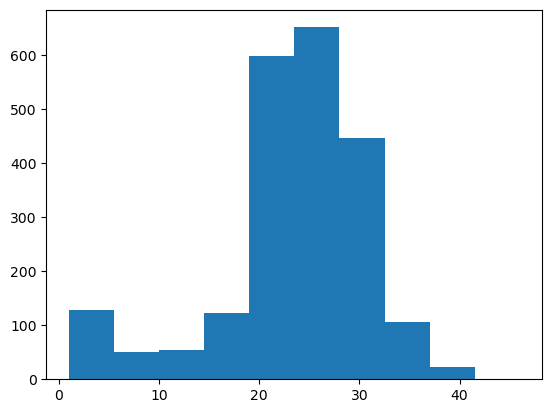

In [18]:
plt.hist(df[df.label_mhc==True].umi_count_mhc)
plt.show()

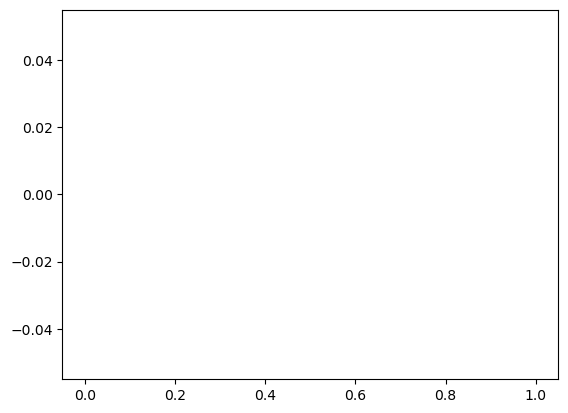

In [20]:
plt.hist(df[df.label_mhc!=True].umi_count_mhc)
plt.show()

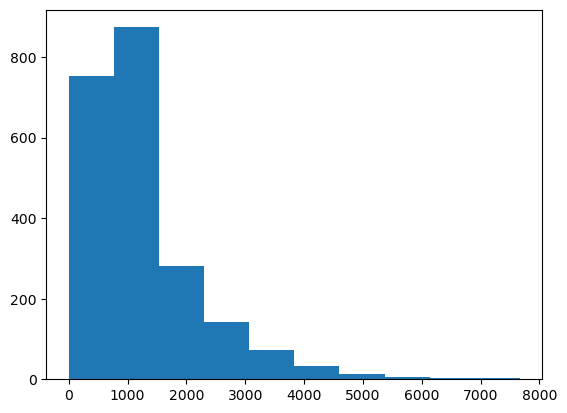

In [14]:
plt.hist(df.umi_count_cd8)
plt.show()

In [36]:
df[(df.umi_count_mhc >= 2) & (df.delta_umi_mhc >= 1)].groupby(['peptide_HLA','label']).ct.size()

peptide_HLA        label
CLGGLLTMV A0201    0.0         7
                   1.0       190
FLYALALLL A0201    0.0         2
                   1.0        55
GILGFVFTL A0201    1.0         4
GLCTLVAML A0201    1.0         9
NLVPMVATV A0201    1.0         5
RPHERNGFTV B0702   0.0         5
                   1.0        24
RPHERNGFTVL B0702  1.0       361
RPPIFIRRL B0702    0.0         2
                   1.0       196
RVRAYTYSK A0301    0.0        92
                   1.0      2295
TPRVTGGGAM B0702   0.0        18
                   1.0       844
TPSVSSSISSL B0702  0.0         2
                   1.0        59
VLEETSVML A0201    0.0         4
                   1.0       506
YVLDHLIVV A0201    0.0         6
                   1.0       428
Name: ct, dtype: int64

In [48]:
df[(df.umi_count_mhc >= 2) & (df.delta_umi_mhc >= 1) & (df.delta_umi_TRA >= 1) & (df.delta_umi_TRB >= 1)].groupby(['peptide_HLA','label']).ct.size()

peptide_HLA        label
CLGGLLTMV A0201    0.0         4
                   1.0       114
FLYALALLL A0201    0.0         1
                   1.0        32
GILGFVFTL A0201    1.0         2
GLCTLVAML A0201    1.0         5
NLVPMVATV A0201    1.0         4
RPHERNGFTV B0702   0.0         3
                   1.0        15
RPHERNGFTVL B0702  1.0       271
RPPIFIRRL B0702    1.0       110
RVRAYTYSK A0301    0.0        56
                   1.0      1395
TPRVTGGGAM B0702   0.0        13
                   1.0       609
TPSVSSSISSL B0702  0.0         1
                   1.0        40
VLEETSVML A0201    0.0         3
                   1.0       406
YVLDHLIVV A0201    0.0         2
                   1.0       272
Name: ct, dtype: int64

In [47]:
df.HLA_match.sum() / len(df)

0.6737449022640979

In [41]:
df[(df.umi_count_mhc >= 14) & (df.delta_umi_mhc >= 2)].HLA_match.sum()

1488

In [42]:
len(df[(df.umi_count_mhc >= 14) & (df.delta_umi_mhc >= 2)])

1664

In [40]:
3869/5114

0.7565506452874462

In [43]:
1488/1664

0.8942307692307693

In [33]:
df.HLA_cd8

0       [A0201, B0702]
1       [A0201, A0301]
2              [B0702]
3              [A0201]
4              [B0702]
             ...      
7106    [A0201, A0301]
7107    [A0201, A0301]
7108           [B0702]
7109           [A0201]
7110    [A0201, A0301]
Name: HLA_cd8, Length: 7111, dtype: object

In [34]:
df.HLA_mhc

0       B0702
1       A0301
2       B0702
3       A0201
4       B0702
        ...  
7106    A0301
7107    B0702
7108    A0301
7109    A0301
7110    A0201
Name: HLA_mhc, Length: 7111, dtype: object

In [35]:
df[['HLA_mhc','HLA_cd8','HLA_match']]

,HLA_mhc,HLA_cd8,HLA_match
0,B0702,"[A0201, B0702]",True
1,A0301,"[A0201, A0301]",True
2,B0702,[B0702],True
3,A0201,[A0201],True
4,B0702,[B0702],True
...,...,...,...
7106,A0301,"[A0201, A0301]",True
7107,B0702,"[A0201, A0301]",False
7108,A0301,[B0702],False
7109,A0301,[A0201],False


In [18]:
df.columns

Index(['gem', 'clonotype', 'num_clonotype', 'ct', 'genes_TRA', 'genes_TRB',
       'genes_lst_TRA', 'genes_lst_TRB', 'length_TRA', 'cdr1_TRA', 'cdr2_TRA',
       'cdr3_TRA', 'umi_count_TRA', 'umi_count_lst_TRA', 'delta_umi_TRA',
       'cdr3_lst_TRA', 'chain_count_TRA', 'single_TRA', 'length_TRB',
       'cdr1_TRB', 'cdr2_TRB', 'cdr3_TRB', 'umi_count_TRB',
       'umi_count_lst_TRB', 'delta_umi_TRB', 'cdr3_lst_TRB', 'chain_count_TRB',
       'single_TRB', 'single_chain_only', 'umi_count_tcr', 'cdr3_comb',
       'v_gene_TRA', 'j_gene_TRA', 'v_gene_TRB', 'j_gene_TRB', 'tcr_category',
       'no_filtration', 'exclude_single-chain_TCRs',
       'exclude_ambiguous_and_single-chain_TCRs', 'exclude_ambiguous_TCRs',
       'label', 'umi_count_mhc', 'umi_count_lst_mhc', 'delta_umi_mhc',
       'single_barcode_mhc', 'multiplets_mhc', 'umi_count_cd8',
       'umi_count_lst_cd8', 'delta_umi_cd8', 'single_barcode_cd8',
       'multiplets_cd8', 'detected_response', 'peptide_assayed', 'sample_id',
 

In [8]:
df = pd.read_csv(VALID)

In [9]:
df.pep_match

0        True
1        True
2        True
3        True
4        True
        ...  
2314     True
2315     True
2316    False
2317     True
2318    False
Name: pep_match, Length: 2319, dtype: bool

In [42]:
v_ct = df.groupby('ct').pep_match.nunique()

In [44]:
v_ct[v_ct > 1].index

Float64Index([   1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    8.0,   10.0,
                12.0,   13.0,   17.0,   18.0,   19.0,   23.0,   24.0,   28.0,
                35.0,   42.0,   46.0,   52.0,   54.0,   72.0,  122.0,  170.0,
               274.0, 1435.0, 2471.0, 5199.0, 5211.0, 5587.0, 5609.0],
             dtype='float64', name='ct')

In [16]:
df.loc[df.ct == 1, ['ct_pep','pep_match','peptide_HLA','peptide_HLA_lst','likely_HLA_mhc','HLA_pool_cd8','HLA_match']]

,ct_pep,pep_match,peptide_HLA,peptide_HLA_lst,likely_HLA_mhc,HLA_pool_cd8,HLA_match
4,VLEETSVML A0201,True,VLEETSVML A0201,"['YVLDHLIVV A0201', 'RVRAYTYSK A0301', 'VLEETS...","['A0201', 'A0301', 'A0201']",['A0201' 'A0301' 'B0702'],True
5,VLEETSVML A0201,True,VLEETSVML A0201,['VLEETSVML A0201'],['A0201'],['A0201' 'A0301' 'B0702'],True
6,VLEETSVML A0201,True,VLEETSVML A0201,['VLEETSVML A0201'],['A0201'],['A0201' 'A0301' 'B0702'],True
10,VLEETSVML A0201,True,VLEETSVML A0201,"['RVRAYTYSK A0301', 'VLEETSVML A0201']","['A0301', 'A0201']",['A0201' 'A0301' 'B0702'],True
16,VLEETSVML A0201,True,VLEETSVML A0201,"['TPRVTGGGAM B0702', 'VLEETSVML A0201']",['A0201'],['A0201' 'A0301' 'B0702'],True
...,...,...,...,...,...,...,...
2260,VLEETSVML A0201,True,VLEETSVML A0201,"['RVRAYTYSK A0301', 'VLEETSVML A0201']","['A0301', 'A0201']",['A0201' 'A0301' 'B0702'],True
2274,VLEETSVML A0201,False,RVRAYTYSK A0301,"['VLEETSVML A0201', 'RVRAYTYSK A0301']","['A0201', 'A0301']",['A0201' 'A0301' 'B0702'],True
2282,VLEETSVML A0201,True,VLEETSVML A0201,"['YVLDHLIVV A0201', 'RVRAYTYSK A0301', 'VLEETS...","['A0201', 'A0301', 'A0201']",['A0201' 'A0301' 'B0702'],True
2292,VLEETSVML A0201,True,VLEETSVML A0201,['VLEETSVML A0201'],['A0201'],['A0201' 'A0301' 'B0702'],True


In [13]:
df.columns

Index(['gem', 'clonotype', 'num_clonotype', 'ct', 'genes_TRA', 'genes_TRB',
       'genes_lst_TRA', 'genes_lst_TRB', 'length_TRA', 'cdr1_TRA', 'cdr2_TRA',
       'cdr3_TRA', 'umi_count_TRA', 'umi_count_lst_TRA', 'delta_umi_TRA',
       'cdr3_lst_TRA', 'chain_count_TRA', 'single_TRA', 'length_TRB',
       'cdr1_TRB', 'cdr2_TRB', 'cdr3_TRB', 'umi_count_TRB',
       'umi_count_lst_TRB', 'delta_umi_TRB', 'cdr3_lst_TRB', 'chain_count_TRB',
       'single_TRB', 'single_chain_only', 'umi_count_tcr', 'cdr3_comb',
       'v_gene_TRA', 'j_gene_TRA', 'v_gene_TRB', 'j_gene_TRB', 'tcr_category',
       'no_filtration', 'exclude_single-chain_TCRs',
       'exclude_ambiguous_and_single-chain_TCRs', 'exclude_ambiguous_TCRs',
       'label', 'umi_count_mhc', 'umi_count_lst_mhc', 'delta_umi_mhc',
       'single_barcode_mhc', 'multiplets_mhc', 'umi_count_cd8',
       'umi_count_lst_cd8', 'delta_umi_cd8', 'single_barcode_cd8',
       'multiplets_cd8', 'detected_response', 'peptide_assayed', 'sample_id',
 

In [23]:
clone = 1

In [45]:
peptides = df[df.ct == clone].peptide_HLA.unique()
peptides

array(['VLEETSVML A0201', 'RPPIFIRRL B0702', 'TPRVTGGGAM B0702',
       'RVRAYTYSK A0301', 'CLGGLLTMV A0201', 'YVLDHLIVV A0201',
       'RPHERNGFTVL B0702', 'FLYALALLL A0201'], dtype=object)

In [25]:
clonotypes = df[df.peptide_HLA.isin(peptides)].ct.astype(int).unique()

In [31]:
clonotypes = clonotypes[clonotypes != clone]

In [34]:
df.loc[df.ct.isin(clonotypes), ['cdr3_TRA','cdr3_TRB']]

,cdr3_TRA,cdr3_TRB
0,CAVRAITGGGNKLTF,CASSTPSSGPQETQYF
1,CATVVRMDSSYKLIF,CASSLIGQGKKDEQFF
2,CAMREPSNYGGSQGNLIF,CSARDLAGSSGANVLTF
3,CAMREGMDSSYKLIF,0
7,CATVVRMDSSYKLIF,CASSLIGQGKKDEQFF
...,...,...
2314,0,CASSYVGYEQYF
2315,0,CASSPDRSRANTGELFF
2316,0,CASSTHDSEGALSPLHF
2317,0,CASSYVGYEQYF


In [39]:
df.loc[df.ct == clone, ['cdr3_lst_TRA', 'cdr3_lst_TRB']].drop_duplicates()

,cdr3_lst_TRA,cdr3_lst_TRB
4,['CGTEGAGNNRKLIW'],['CASSQVFGTPTPQHF']
1612,[''],['CASSQVFGTPTPQHF']
